<div style="padding:30px 0px;">
    <h1 align="center" style="padding:50px">Polynomial Features and Linear Regression</h1>
    <p align="center" style="font-size:small;">Seth Pruitt<br>spruitt@norstal.com<br>www.github.com/faradical</p>
</div>

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## Generating Synthetic Data

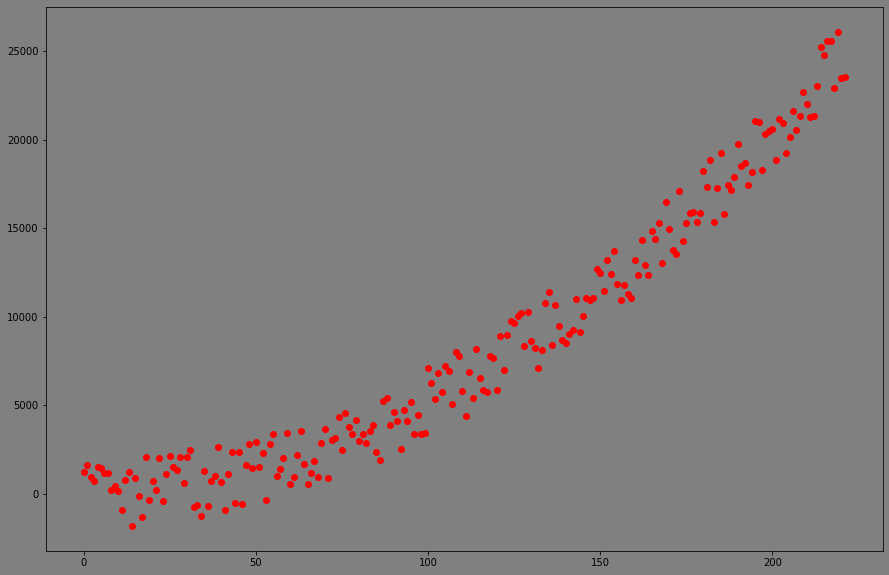

In [2]:
import numpy as np
import random as rn

# Defining a polynomial
def y_f(x):
    return (0.5 * (x**2)) + (2 * x) + 6

# Building X an Y variables with noise on Y
X = np.arange(222)
y = [y_f(x)+rn.randint(-2000,2000) for x in X]

# Plotting the dummy data
plt.figure(facecolor='gray', figsize=(15,10)).set_alpha(0.0)
ax = plt.axes()
ax.set_facecolor("gray")
ax.set_alpha(0.0)

plt.scatter(X, y, c='red', marker="o")
plt.show()

In [3]:
# Split the data into traing and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Defining a Poly Pipe

In [4]:
# Import PolynomialFeatures to help fit the linear model to the curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

# Creating a reshape function
def reshape(X):
    return X.reshape(-1, 1)

# Defining a new pipeline
steps = [
    ("Reshape", FunctionTransformer(reshape)),
    ("Scaler", StandardScaler()),
    ("PolynomialFeatures", PolynomialFeatures()),
    ("Linear Regression", LinearRegression())
]
p3 = Pipeline(steps)

## Executing a Grid Search Over the Poly Pipe

In [5]:
# Define a dictionary of hyperparameters for both the model and pipeline steps.
param_grid = {
    'Scaler__with_mean': [True, False],
    'Scaler__with_std': [True, False],
    'PolynomialFeatures__degree': np.arange(1,4),
    'PolynomialFeatures__interaction_only': [True, False],
    'PolynomialFeatures__include_bias': [True, False],
    'PolynomialFeatures__order': ['C', 'F'],
    'Linear Regression__copy_X': [True, False],
    'Linear Regression__fit_intercept': [True, False]
}

# Perform a grid search with cross-validation
grid = GridSearchCV(p3, param_grid, cv=5)

# Fit and score the pipeline
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.9665631322288649

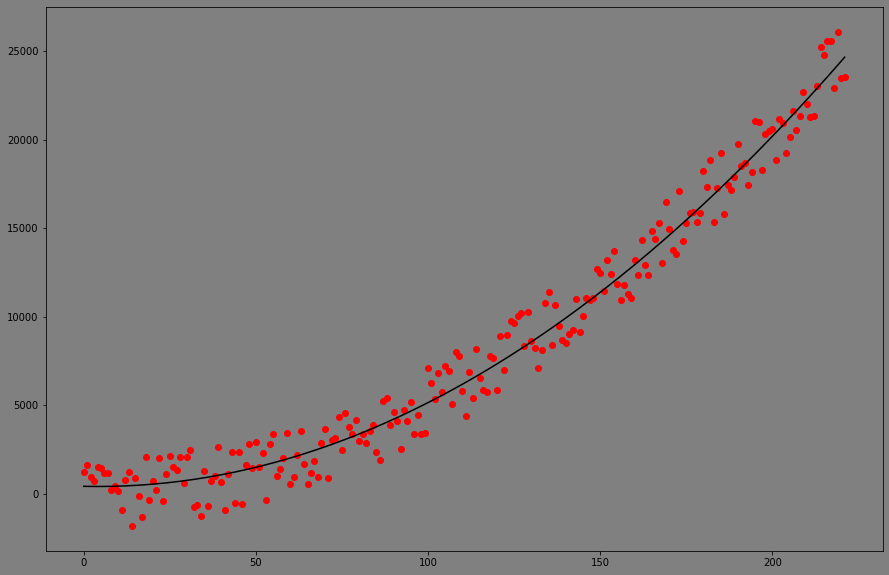

In [6]:
predictions = grid.predict(X)

# Plotting the dummy data and predictions together.
plt.figure(facecolor='gray', figsize=(15,10)).set_alpha(0.0)
ax = plt.axes()
ax.set_facecolor("gray")
ax.set_alpha(0.0)

plt.scatter(X, y, c='red', marker="o")
plt.plot(X, predictions, c="black")
plt.show()

In [7]:
grid.best_params_

{'Linear Regression__copy_X': True,
 'Linear Regression__fit_intercept': True,
 'PolynomialFeatures__degree': 2,
 'PolynomialFeatures__include_bias': True,
 'PolynomialFeatures__interaction_only': False,
 'PolynomialFeatures__order': 'F',
 'Scaler__with_mean': True,
 'Scaler__with_std': False}